In [1]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
# Import the train_test_learn module
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import os

files = os.listdir('.')
print(files)

['cleaningdata.ipynb', 'untitled_project', 'README.md', 'machine_learning_2.ipynb', '.ipynb_checkpoints', 'DataModel.ipynb', '.git', 'ApiCollection.ipynb', 'DATA_SET', 'machine_learning.ipynb']


In [3]:
import pandas as pd
from pathlib import Path

# Read the CSV file from the current directory into a Pandas DataFrame
data = Path('DATA_SET/Cleaned_data.csv')
df = pd.read_csv(data)

# Review the DataFrame (displayed both head and tail to see if 'loan_status' has both 0's and 1's)
display(df.head())
display(df.tail())

,Marital status,Daytime/evening attendance,Previous qualification,Nationality,Mother qualification,Father qualification,Tuition fees up to date,Gender,Scholarship holder,International,Age at enrollment,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Target
0,1,1,1,1,13,10,1,1,0,0,20,0.000000,0.000000,Dropout
1,1,1,1,1,1,3,0,1,0,0,19,14.000000,13.666667,Graduate
2,1,1,1,1,22,27,0,1,0,0,19,0.000000,0.000000,Dropout
3,1,1,1,1,23,27,1,0,0,0,20,13.428571,12.400000,Graduate
4,2,0,1,1,22,28,1,0,0,0,45,12.333333,13.000000,Graduate


,Marital status,Daytime/evening attendance,Previous qualification,Nationality,Mother qualification,Father qualification,Tuition fees up to date,Gender,Scholarship holder,International,Age at enrollment,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Target
4419,1,1,1,1,1,1,1,1,0,0,19,13.600000,12.666667,Graduate
4420,1,1,1,19,1,1,0,0,0,1,18,12.000000,11.000000,Dropout
4421,1,1,1,1,22,27,1,0,1,0,30,14.912500,13.500000,Dropout
4422,1,1,1,1,22,27,1,0,1,0,20,13.800000,12.000000,Graduate
4423,1,1,1,9,23,27,1,0,0,1,22,11.666667,13.000000,Graduate


In [5]:
# Generating descriptive statistics
df.describe()

,Marital status,Daytime/evening attendance,Previous qualification,Nationality,Mother qualification,Father qualification,Tuition fees up to date,Gender,Scholarship holder,International,Age at enrollment,Curricular units 1st sem (grade),Curricular units 2nd sem (grade)
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,0.890823,2.531420,1.254521,12.322107,16.455244,0.880651,0.351718,0.248418,0.024864,23.265145,10.640822,10.230206
std,0.605747,0.311897,3.963707,1.748447,9.026251,11.044800,0.324235,0.477560,0.432144,0.155729,7.587816,4.843663,5.210808
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000,19.000000,11.000000,10.750000
50%,1.000000,1.000000,1.000000,1.000000,13.000000,14.000000,1.000000,0.000000,0.000000,0.000000,20.000000,12.285714,12.200000
75%,1.000000,1.000000,1.000000,1.000000,22.000000,27.000000,1.000000,1.000000,0.000000,0.000000,25.000000,13.400000,13.333333
max,6.000000,1.000000,17.000000,21.000000,29.000000,34.000000,1.000000,1.000000,1.000000,1.000000,70.000000,18.875000,18.571429


In [6]:
# Checking the data types for each features
df.dtypes

Marital status                        int64
Daytime/evening attendance            int64
Previous qualification                int64
Nationality                           int64
Mother qualification                  int64
Father qualification                  int64
Tuition fees up to date               int64
Gender                                int64
Scholarship holder                    int64
International                         int64
Age at enrollment                     int64
Curricular units 1st sem (grade)    float64
Curricular units 2nd sem (grade)    float64
Target                               object
dtype: object

In [7]:
# Determine the number of unique values in each column.
df.nunique()           

Marital status                        6
Daytime/evening attendance            2
Previous qualification               17
Nationality                          21
Mother qualification                 29
Father qualification                 34
Tuition fees up to date               2
Gender                                2
Scholarship holder                    2
International                         2
Age at enrollment                    46
Curricular units 1st sem (grade)    805
Curricular units 2nd sem (grade)    786
Target                                3
dtype: int64

In [8]:
# Check the category for 'Targets'
type_counts = df['Target'].value_counts()
type_counts

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [9]:
# Convert 'Graduate' to 2, 'Enrolled' to 1 and 'Dropout' to 0
df['Target'] = df['Target'].map({'Graduate': 2, 'Enrolled': 1, 'Dropout': 0})
df.head()

,Marital status,Daytime/evening attendance,Previous qualification,Nationality,Mother qualification,Father qualification,Tuition fees up to date,Gender,Scholarship holder,International,Age at enrollment,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Target
0,1,1,1,1,13,10,1,1,0,0,20,0.000000,0.000000,0
1,1,1,1,1,1,3,0,1,0,0,19,14.000000,13.666667,2
2,1,1,1,1,22,27,0,1,0,0,19,0.000000,0.000000,0
3,1,1,1,1,23,27,1,0,0,0,20,13.428571,12.400000,2
4,2,0,1,1,22,28,1,0,0,0,45,12.333333,13.000000,2


In [10]:
# Checking the data types for 'Target'
df.dtypes

Marital status                        int64
Daytime/evening attendance            int64
Previous qualification                int64
Nationality                           int64
Mother qualification                  int64
Father qualification                  int64
Tuition fees up to date               int64
Gender                                int64
Scholarship holder                    int64
International                         int64
Age at enrollment                     int64
Curricular units 1st sem (grade)    float64
Curricular units 2nd sem (grade)    float64
Target                                int64
dtype: object

array([[<Axes: title={'center': 'Marital status'}>,
        <Axes: title={'center': 'Daytime/evening attendance'}>,
        <Axes: title={'center': 'Previous qualification'}>,
        <Axes: title={'center': 'Nationality'}>],
       [<Axes: title={'center': 'Mother qualification'}>,
        <Axes: title={'center': 'Father qualification'}>,
        <Axes: title={'center': 'Tuition fees up to date'}>,
        <Axes: title={'center': 'Gender'}>],
       [<Axes: title={'center': 'Scholarship holder'}>,
        <Axes: title={'center': 'International'}>,
        <Axes: title={'center': 'Age at enrollment'}>,
        <Axes: title={'center': 'Curricular units 1st sem (grade)'}>],
       [<Axes: title={'center': 'Curricular units 2nd sem (grade)'}>,
        <Axes: title={'center': 'Target'}>, <Axes: >, <Axes: >]],
      dtype=object)

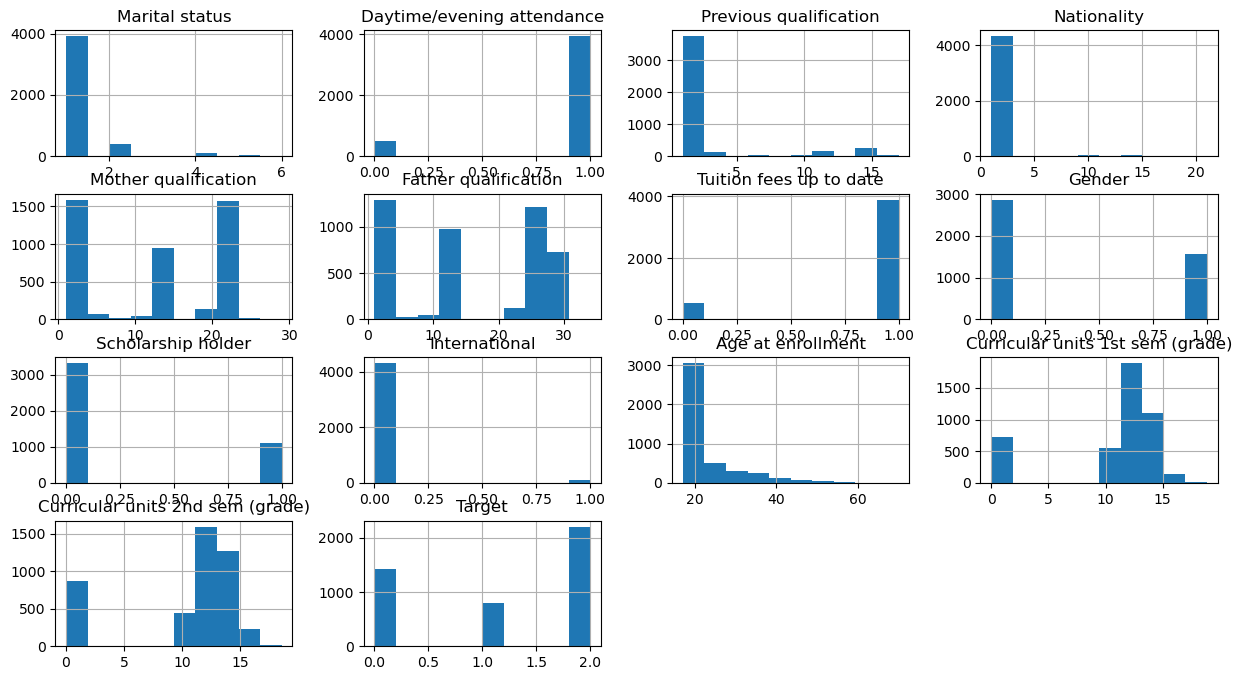

In [11]:
df.hist(figsize = (15,8))

In [12]:
df.corr()

,Marital status,Daytime/evening attendance,Previous qualification,Nationality,Mother qualification,Father qualification,Tuition fees up to date,Gender,Scholarship holder,International,Age at enrollment,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Target
Marital status,1.000000,-0.274939,0.120925,-0.020722,0.185522,0.128326,-0.087158,-0.014738,-0.053765,-0.027905,0.522717,-0.059811,-0.071506,-0.089804
Daytime/evening attendance,-0.274939,1.000000,-0.103022,0.024433,-0.195346,-0.137769,0.038799,-0.012326,0.093912,0.027973,-0.462280,0.063974,0.050493,0.075107
Previous qualification,0.120925,-0.103022,1.000000,-0.038997,0.018868,0.013152,-0.095246,0.089952,-0.085668,-0.033498,0.249821,-0.034252,-0.038765,-0.091365
Nationality,-0.020722,0.024433,-0.038997,1.000000,-0.043847,-0.088892,-0.041721,-0.025462,-0.018468,0.911724,-0.008241,0.002578,-0.005409,-0.004740
Mother qualification,0.185522,-0.195346,0.018868,-0.043847,1.000000,0.524529,-0.022861,-0.062374,0.048225,-0.038672,0.279921,-0.034105,-0.028472,-0.038346
Father qualification,0.128326,-0.137769,0.013152,-0.088892,0.524529,1.000000,-0.018033,-0.073614,0.107134,-0.086503,0.190410,-0.006245,-0.006508,0.000329
Tuition fees up to date,-0.087158,0.038799,-0.095246,-0.041721,-0.022861,-0.018033,1.000000,-0.104098,0.137421,-0.044202,-0.178099,0.250394,0.296480,0.409827
Gender,-0.014738,-0.012326,0.089952,-0.025462,-0.062374,-0.073614,-0.104098,1.000000,-0.169302,-0.026415,0.148835,-0.189448,-0.199133,-0.229270
Scholarship holder,-0.053765,0.093912,-0.085668,-0.018468,0.048225,0.107134,0.137421,-0.169302,1.000000,-0.027972,-0.189917,0.168324,0.181227,0.297595
International,-0.027905,0.027973,-0.033498,0.911724,-0.038672,-0.086503,-0.044202,-0.026415,-0.027972,1.000000,-0.007111,0.006314,0.001460,0.003934


<Axes: >

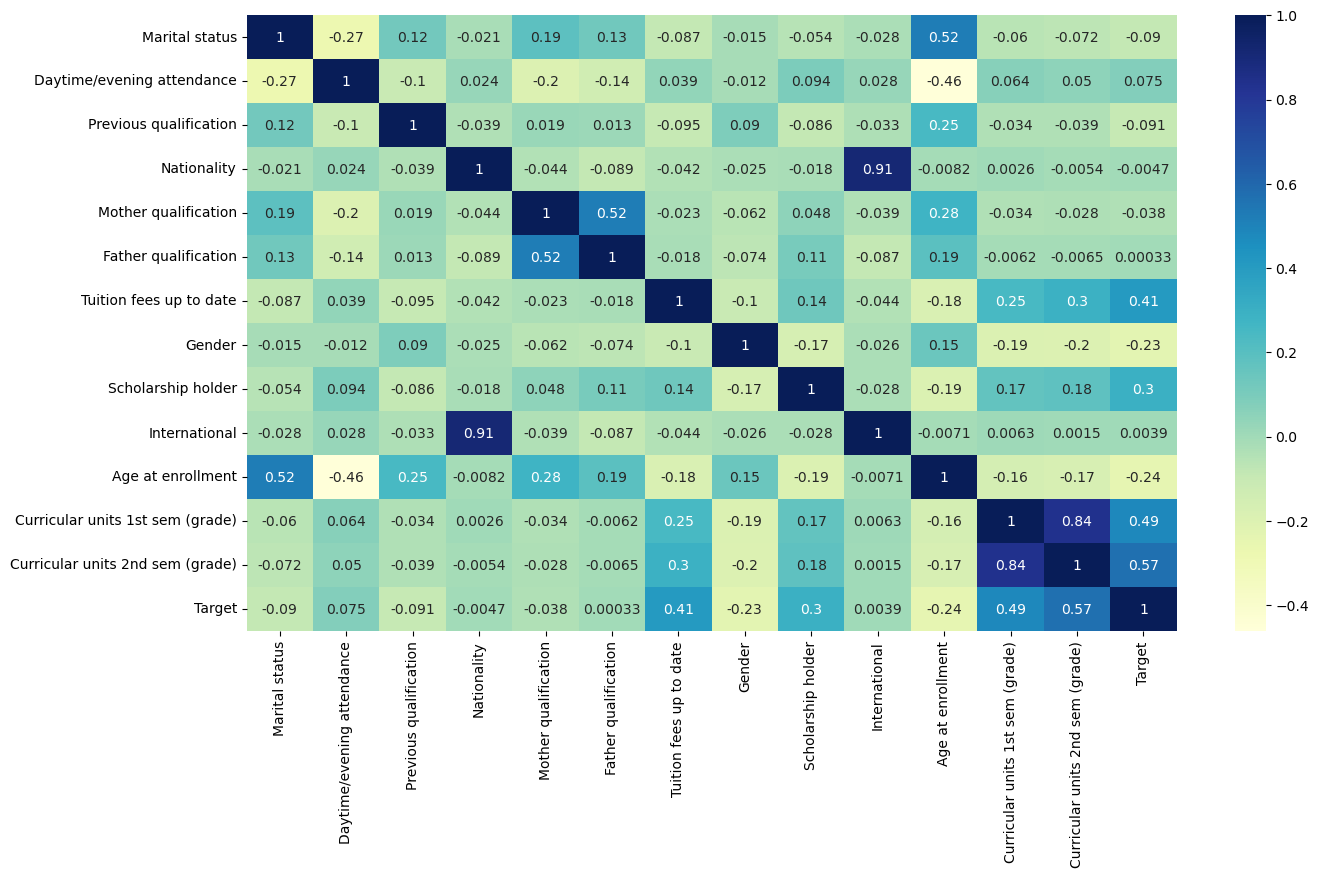

In [13]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')

In [16]:
# Select the categorical columns for one-hot encoding, this is to make sure that the machine learning algorithm sees these values as categorical values rather than numerical values.
categorical_cols = ['Marital status', 'Daytime/evening attendance', 'Previous qualification', 'Nationality',
                    'Mother qualification', 'Father qualification', 'Tuition fees up to date', 'Gender',
                    'Scholarship holder', 'International', 'Age at enrollment', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']

# Apply one-hot encoding to the categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, dtype=int)

# Display the encoded DataFrame
df_encoded.head()

,Target,Marital status_1,Marital status_2,Marital status_3,Marital status_4,Marital status_5,Marital status_6,Daytime/evening attendance_0,Daytime/evening attendance_1,Previous qualification_1,...,Curricular units 2nd sem (grade)_16.8,Curricular units 2nd sem (grade)_16.90909090909091,Curricular units 2nd sem (grade)_17.0,Curricular units 2nd sem (grade)_17.166666666666668,Curricular units 2nd sem (grade)_17.428571428571427,Curricular units 2nd sem (grade)_17.5875,Curricular units 2nd sem (grade)_17.6,Curricular units 2nd sem (grade)_17.692307692307693,Curricular units 2nd sem (grade)_17.714285714285715,Curricular units 2nd sem (grade)_18.571428571428573
0,0,1,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,1,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,2,1,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,2,0,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
